# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Keras imports
from tensorflow.keras.utils import to_categorical

In [2]:
from book_cover.ml_logic.data import get_data
from book_cover.ml_logic.preprocessor import preprocess_images

# Loading data

## Images

In [3]:
X_train = get_data("../raw_data/train_x.csv")
X_test = get_data("../raw_data/test_x.csv")

In [5]:
X_train.shape, X_test.shape

((51300, 2), (5700, 2))

## Labels

In [6]:
y_train = get_data("../raw_data/train_y.csv")
y_test = get_data("../raw_data/test_y.csv")

In [7]:
y_train.shape, y_test.shape

((51300, 2), (5700, 2))

# Preprocessing

## Images

### Choosing the resizing

In [8]:
train5_224 = preprocess_images(X_train[:5], (224, 224))
train5_149 = preprocess_images(X_train[:5], (149, 149))
train5_112 = preprocess_images(X_train[:5], (112, 112))

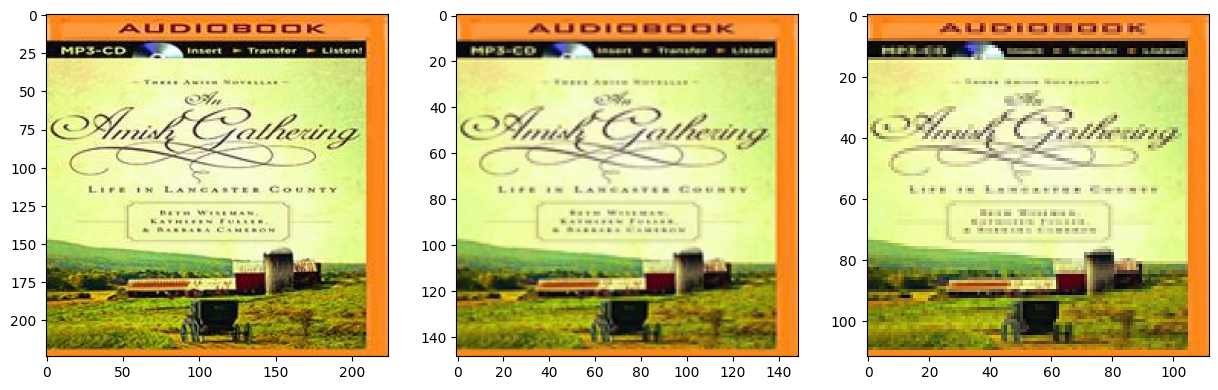

In [9]:
# Let's plot few images to see what they look like
i = 3

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(train5_224[i])

plt.subplot(1,3,2)
plt.imshow(train5_149[i])

plt.subplot(1,3,3)
plt.imshow(train5_112[i])

### 149 x 149 pixels resizing

In [10]:
X_train_half_pp_149 = preprocess_images(X_train, (149, 149))
X_test_half_pp_149 = preprocess_images(X_test, (149, 149))

In [11]:
X_train_half_pp_149.shape, X_test_half_pp_149.shape

((51300, 149, 149, 3), (5700, 149, 149, 3))

### Pixel intensity normalisation

In [12]:
X_train_pp_149 = np.float16(X_train_half_pp_149 / 255.)
X_test_pp_149 = np.float16(X_test_half_pp_149 / 255.)

### Saving preprocessed images as arrays

In [13]:
np.save("../raw_data/Images_temp/X_train_pp_149", X_train_pp_149)
np.save("../raw_data/Images_temp/X_test_pp_149", X_test_pp_149)

## Labels

### Encoding the labels

In [14]:
y_train_pp = to_categorical(y_train['Genre_id'])
y_test_pp = to_categorical(y_test['Genre_id'])

### Saving preprocessed labels as arrays

In [15]:
np.save("../raw_data/Images_temp/y_train_pp", y_train_pp)
np.save("../raw_data/Images_temp/y_test_pp", y_test_pp)

# Loading preprocessed data

In [24]:
X_train_pp_149 = np.load("../raw_data/Images_temp/X_train_pp_149.npy")
X_test_pp_149 = np.load("../raw_data/Images_temp/X_test_pp_149.npy")
y_train_pp = np.load("../raw_data/Images_temp/y_train_pp.npy")
y_test_pp = np.load("../raw_data/Images_temp/y_test_pp.npy")

# Subset code

In [16]:
# Considering only 1/10th of the 50K+ images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(X_train_pp_149), round(len(X_train_pp_149)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(X_test_pp_149), round(len(X_test_pp_149)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
X_train_pp_149_small = X_train_pp_149[idx_train]
X_test_pp_149_small = X_test_pp_149[idx_test]

# and their corresponding labels
y_train_pp_small = y_train_pp[idx_train]
y_test_pp_small = y_test_pp[idx_test]

X_train_pp_149_small.shape, X_test_pp_149_small.shape

((5130, 149, 149, 3), (570, 149, 149, 3))